In [30]:
import numpy as np
import pandas as pd

import numpy.linalg as LA
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, root
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import get_phase_portraits

In [31]:
def extract_counts_of_attractors(df):
    # Reset the index of the DataFrame
    df = df.reset_index(drop=True)

    # Extract FGF and Wnt values (assume they are the same for all rows)
    fgf = df.loc[0, 'FGF']
    wnt = df.loc[0, 'Wnt']

    # Count occurrences of each attractor name
    attractor_counts = df['attractor name'].value_counts()

    # Create a dictionary to hold the result
    result = {'FGF': [fgf], 'Wnt': [wnt]}

    # Add counts for each attractor name dynamically
    for attractor_name, count in attractor_counts.items():
        result[attractor_name] = [count]

    return pd.DataFrame(result)

In [32]:
all_params = pd.read_csv('../median_networks_for_clusters.csv')



simulation = pd.read_csv(
    '../output/MAP.csv',
    sep = ';')
simulation['time'] = simulation['Time']


ics = simulation[simulation['Time'] == 1]# .sample(frac = 0.1)


for _, row in all_params.iterrows():

    name = row['cluster']
    params=row[1:25]

fig_height = 2.5

nCells = ics.shape[0]
# change default dpi
plt.rcParams['figure.dpi'] = 300

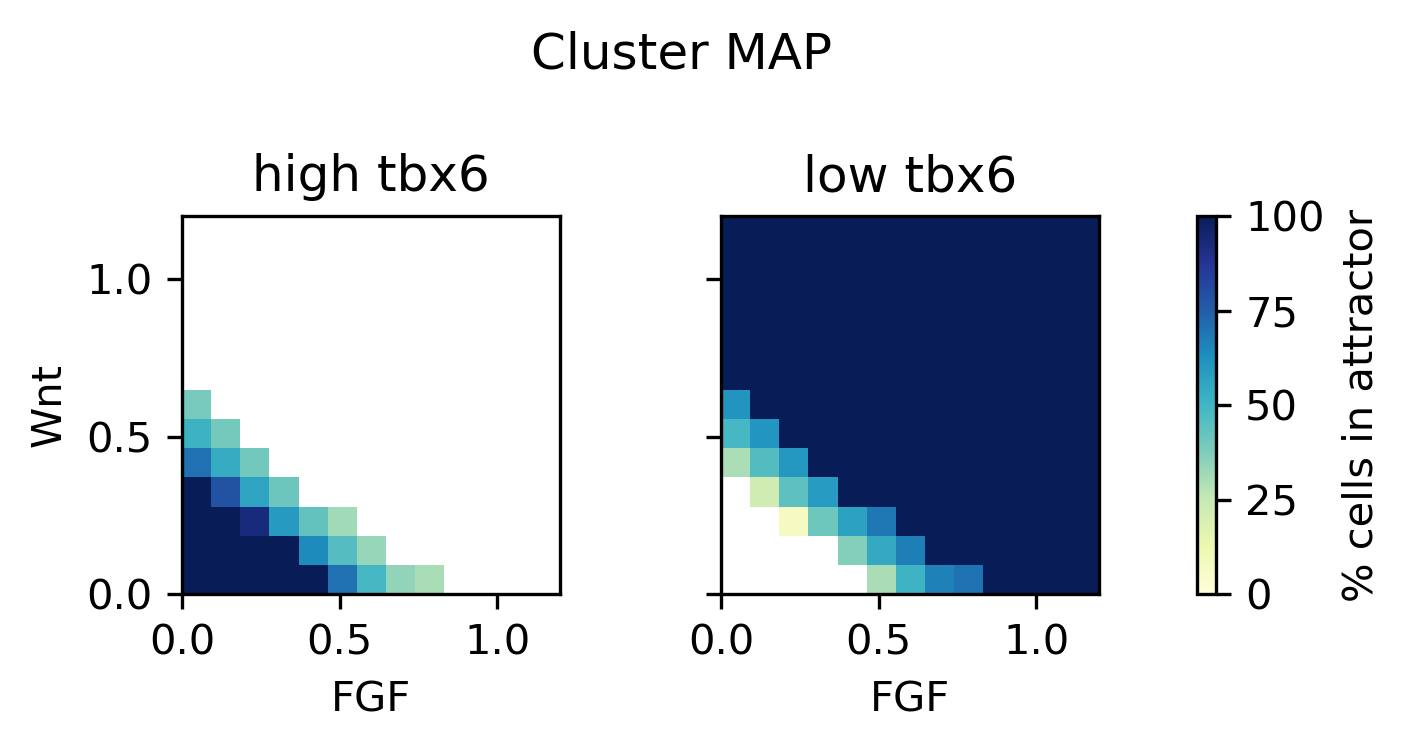

In [33]:
# MAP network

name = 'MAP'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[classified_attractors['g1_traj'] < .25, 'attractor name'] = 'low tbx6'

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 2, figsize = (fig_height*2, fig_height*1),
                       gridspec_kw={'width_ratios': [1, 1.5]},
                        sharex = True, sharey = True,
                        tight_layout = True)

fargs = {'interpolation': 'none',
        'extent' : [WNT_values.min(), WNT_values.max(), FGF_values.min(), FGF_values.max()],
        'origin' : 'lower',
        'cmap': plt.cm.get_cmap('YlGnBu', nCells),
        'alpha' : 1
        }


names = classified_attractors_2.columns[2:]

for idx, axes in enumerate(ax):
    # the replace is to make all 0 objects white
    # so it's obvious where a given attractor is never present
    # might be better to modify the colormap tbh
    classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100
    img = axes.imshow(np.reshape(list(classified_attractors_2[
        names[idx]
        ].replace(0, np.nan)),
                        (len(WNT_values), len(WNT_values))
                        ),
            vmin = 0, vmax = 100,
            **fargs)
    axes.set_title(names[idx])

    axes.set_xlabel('FGF')

ax[0].set_ylabel('Wnt')

cbar = fig.colorbar(img, ax=axes, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')

fig.suptitle(f'Cluster {name}')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


In [35]:


name = '0'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']


classified_attractors['attractor name'] = 'Not spiral'
classified_attractors.loc[
    classified_attractors['g3'] < .25, 'attractor name'
    ] = 'low tbx6'
classified_attractors.loc[
    classified_attractors['attractor type'] == 'm', 'attractor name'
    ] = 'spiral'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 2, figsize = (fig_height*2, fig_height),
                       gridspec_kw={'width_ratios': [1, 1.5]},
                        sharex = True, sharey = True,
                        tight_layout = True)


names = classified_attractors_2.columns[2:]

for idx, axes in enumerate(ax.flatten()):
    # the replace is to make all 0 objects white
    # so it's obvious where a given attractor is never present
    # might be better to modify the colormap tbh
    classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100

    img = axes.imshow(np.reshape(list(classified_attractors_2[
        names[idx]
        ].replace(0, np.nan)),
                        (len(WNT_values), len(WNT_values))
                        ),
            vmin = 0, vmax = 100,
            **fargs)
    axes.set_title(names[idx])
    axes.set_xlabel('FGF')

ax[0].set_ylabel('Wnt')
cbar = fig.colorbar(img, ax=axes, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')

fig.suptitle(f'Cluster {name}')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


KeyError: 'attractor type'

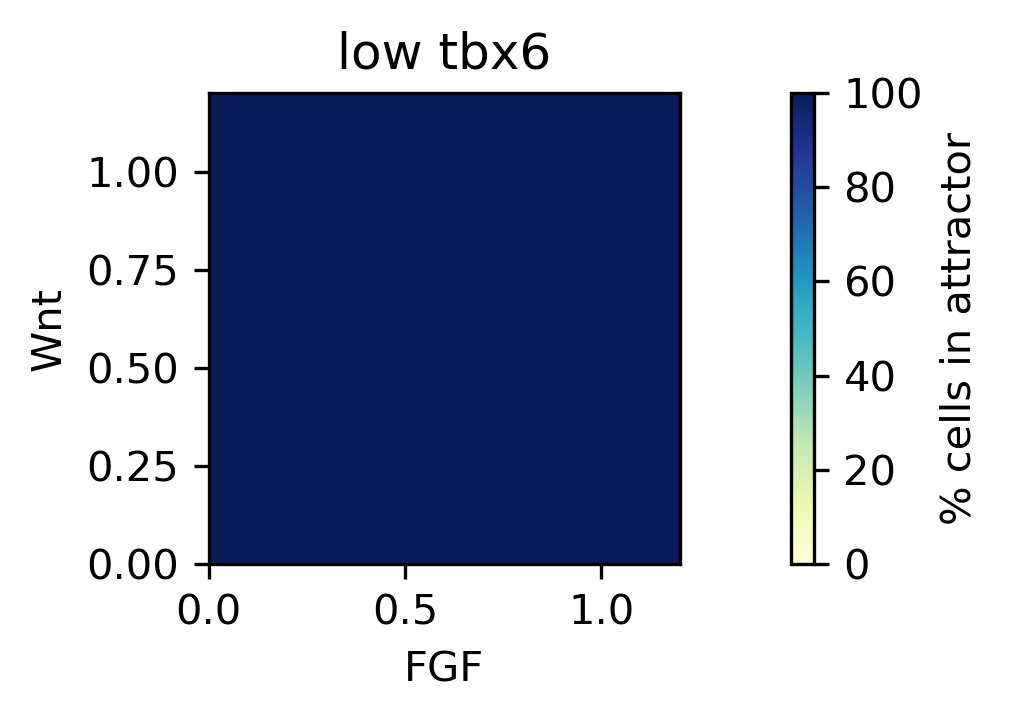

In [36]:
# Network 1
name = '1'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']



classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[
    classified_attractors['g1_traj'] < .25, 'attractor name'
    ] = 'low tbx6'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 1, figsize = (fig_height+1, fig_height),
                    sharex = True, sharey = True,
                    tight_layout = True)


names = classified_attractors_2.columns[2:]

idx = 0

classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100


# the replace is to make all 0 objects white
# so it's obvious where a given attractor is never present
# might be better to modify the colormap tbh
img = ax.imshow(np.reshape(list(classified_attractors_2[names[idx]].replace(0, np.nan)),
                    (len(WNT_values), len(WNT_values))
                    ),
        vmin = 0, vmax = 100, **fargs)
ax.set_title(names[idx])

ax.set_xlabel('FGF')

ax.set_ylabel('Wnt')

cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


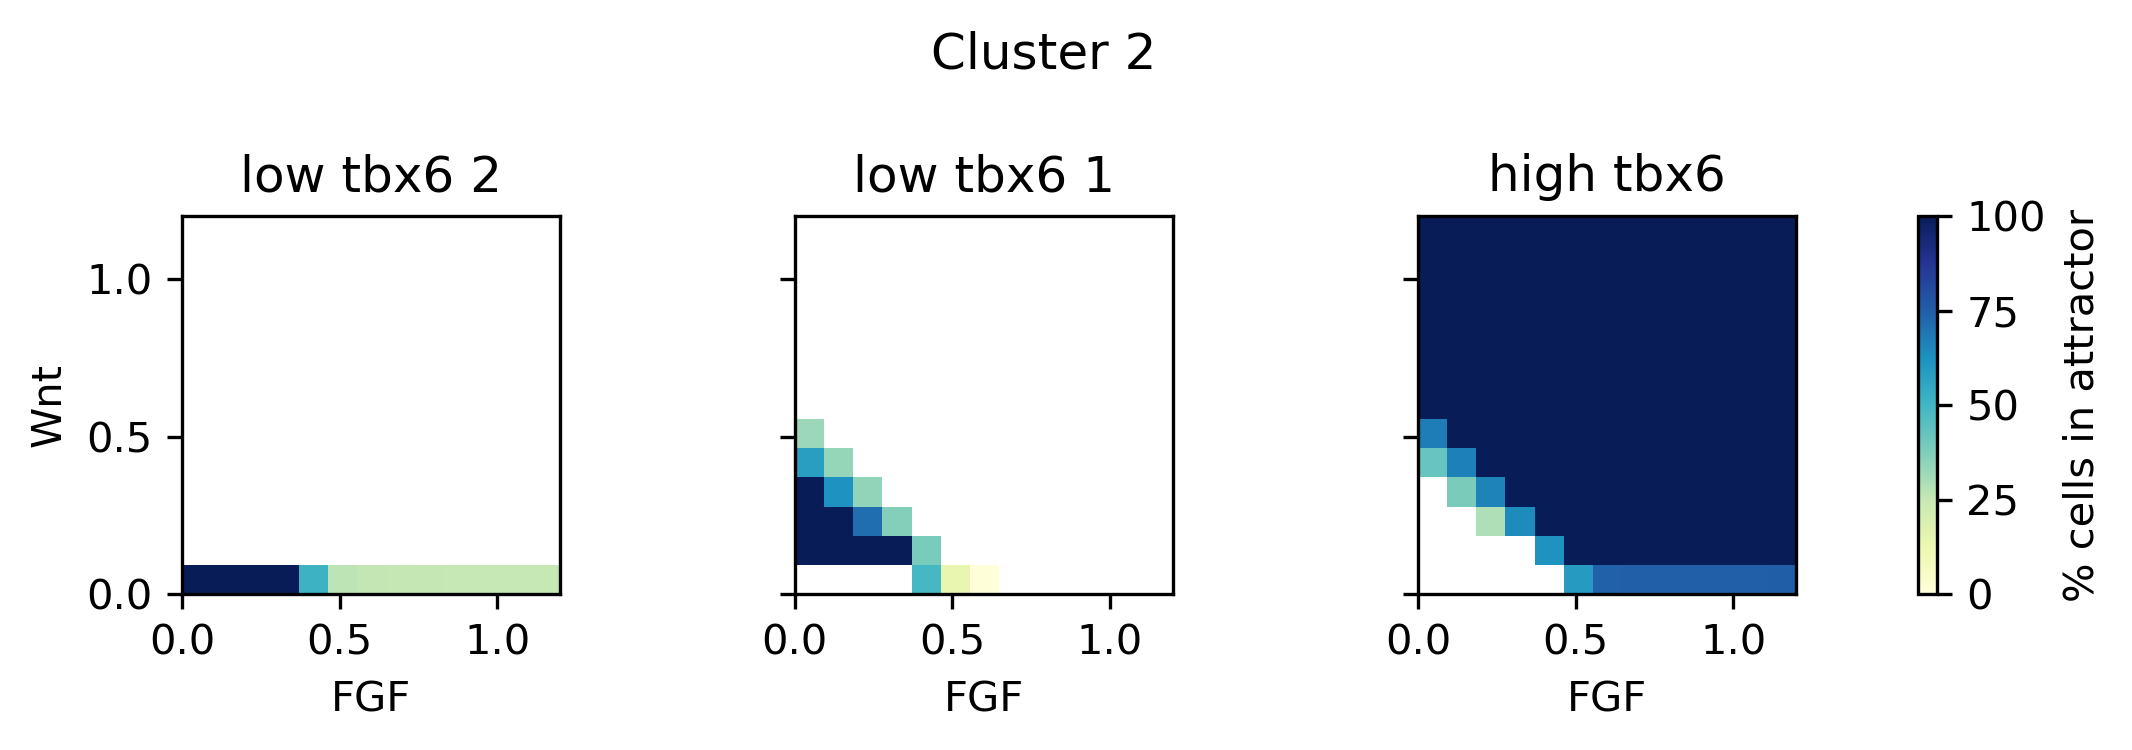

In [37]:
# Network 2
name = '2'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']



classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[
    classified_attractors['g3_traj'] < .25, 'attractor name'
    ] = 'low tbx6 1'

classified_attractors.loc[
    classified_attractors['g1_traj'] > 1, 'attractor name'
    ] = 'low tbx6 2'



classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 3,
                       figsize = (fig_height*3, fig_height),
                    sharex = True, sharey = True,
                     gridspec_kw={'width_ratios': [1, 1, 1.1]},

                    tight_layout = True)


names = classified_attractors_2.columns[2:]

for idx, axes in enumerate(ax.flatten()):
    # the replace is to make all 0 objects white
    # so it's obvious where a given attractor is never present
    # might be better to modify the colormap tbh
    classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100
    img = axes.imshow(np.reshape(list(classified_attractors_2[
        names[idx]
        ].replace(0, np.nan)),
                        (len(WNT_values), len(WNT_values))
                        ),
            vmin = 0, vmax = 100,
            **fargs)
    axes.set_title(names[idx])

    axes.set_xlabel('FGF')

ax[0].set_ylabel('Wnt')
cbar = fig.colorbar(img, ax=axes, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')
fig.suptitle(f'Cluster {name}')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


In [38]:
classified_attractors_2

,FGF,Wnt,low tbx6 2,low tbx6 1,high tbx6
0,0.0,0.0,100.000000,NaN,NaN
1,0.0,0.1,100.000000,NaN,NaN
2,0.0,0.2,100.000000,NaN,NaN
3,0.0,0.3,100.000000,NaN,NaN
4,0.0,0.4,51.137147,48.862853,NaN
...,...,...,...,...,...
164,1.2,0.8,NaN,NaN,100.0
165,1.2,0.9,NaN,NaN,100.0
166,1.2,1.0,NaN,NaN,100.0
167,1.2,1.1,NaN,NaN,100.0


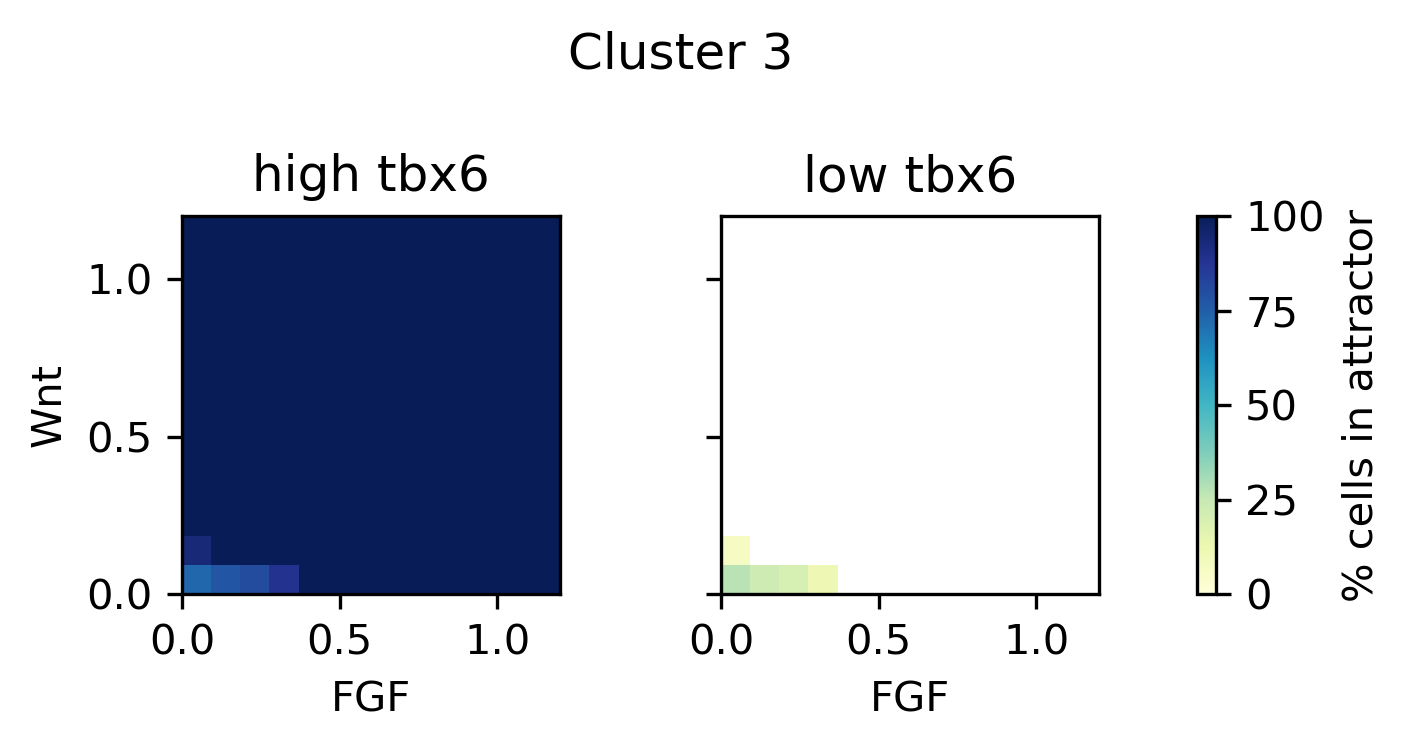

In [39]:
# MAP network

name = '3'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']



classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[classified_attractors['g3_traj'] < .25, 'attractor name'] = 'low tbx6'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 2,
                       figsize = (fig_height*2, fig_height*1),
                       gridspec_kw={'width_ratios': [1, 1.5]},
                       sharex = True, sharey = True,
                       tight_layout = True)

names = classified_attractors_2.columns[2:]

for idx, axes in enumerate(ax.flatten()):
    # the replace is to make all 0 objects white
    # so it's obvious where a given attractor is never present
    # might be better to modify the colormap tbh
    classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100
    img = axes.imshow(np.reshape(list(classified_attractors_2[
        names[idx]
        ].replace(0, np.nan)),
                        (len(WNT_values), len(WNT_values))
                        ),
            vmin = 0, vmax = 100,
            **fargs)
    axes.set_title(names[idx])

    axes.set_xlabel('FGF')

cbar = fig.colorbar(img, ax=axes, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')
ax[0].set_ylabel('Wnt')

fig.suptitle(f'Cluster {name}')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


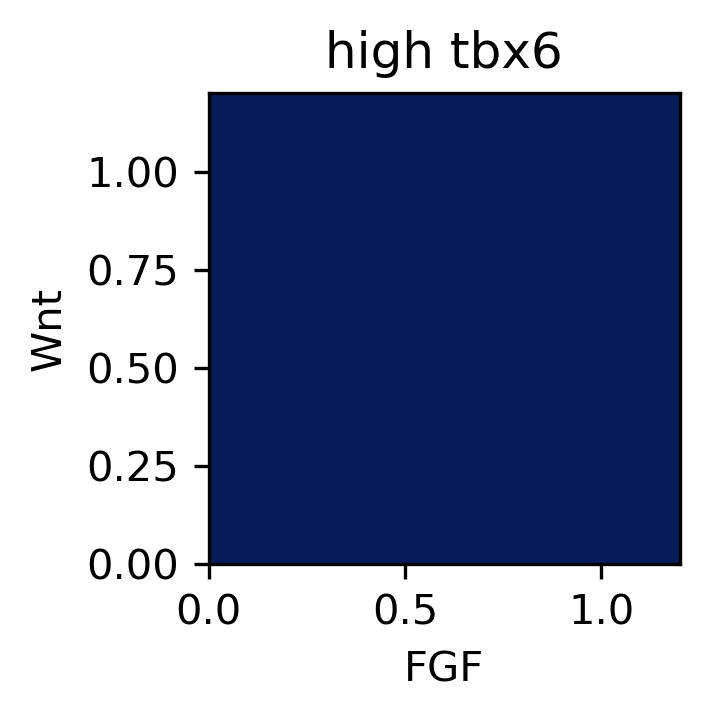

In [45]:
# Network 1
name = '4'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']

classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[
    classified_attractors['g3_traj'] < .25, 'attractor name'
    ] = 'low tbx6'
# classified_attractors.loc[
#     classified_attractors['attractor type'] == 'm', 'attractor name'
#     ] = 'spiral'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 1, figsize = (fig_height, fig_height),
                    sharex = True, sharey = True,
                    tight_layout = True)



names = classified_attractors_2.columns[2:]

idx = 0


# the replace is to make all 0 objects white
# so it's obvious where a given attractor is never present
# might be better to modify the colormap tbh
ax.imshow(np.reshape(list(classified_attractors_2[names[idx]].replace(0, np.nan)),
                    (len(WNT_values), len(WNT_values))
                    ),
        vmin = 1, vmax = ics.shape[0], **fargs)
ax.set_title(names[idx])

ax.set_xlabel('FGF')

ax.set_ylabel('Wnt')

plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


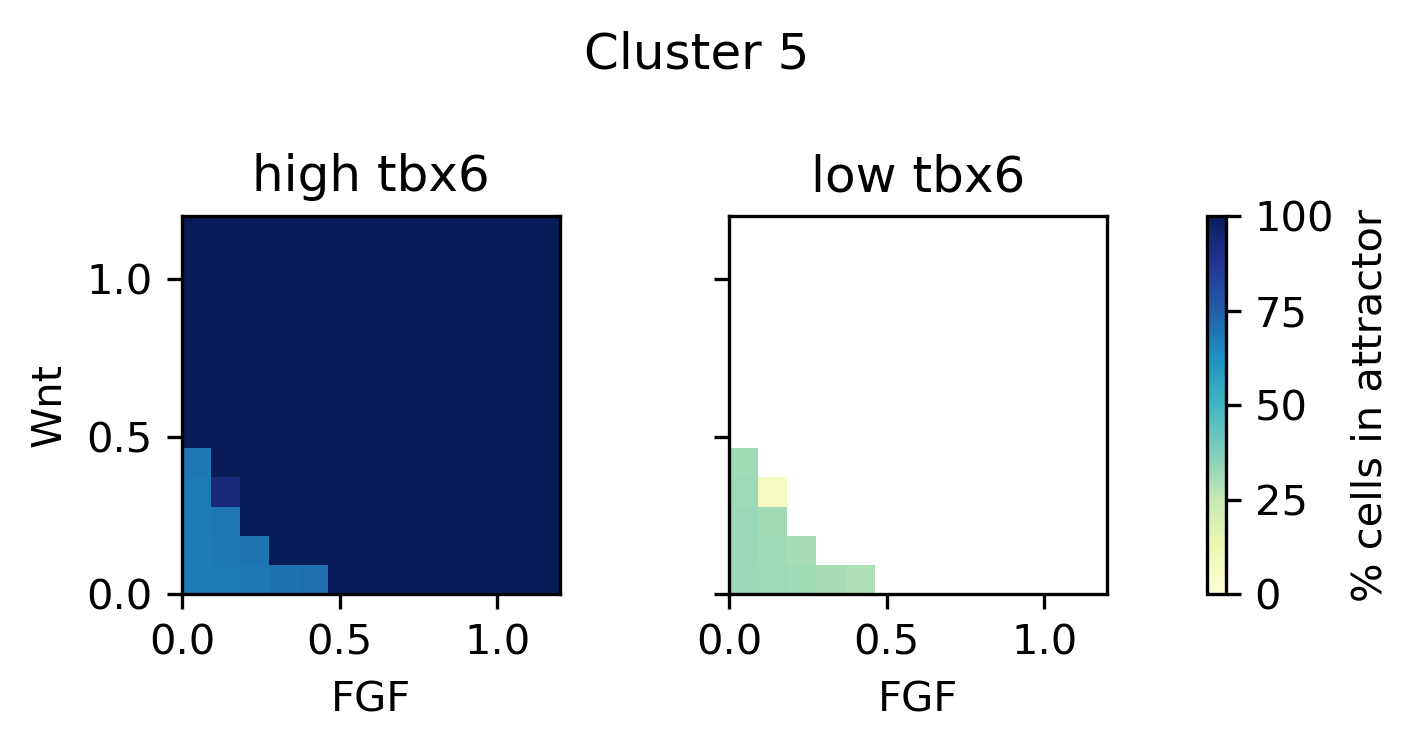

In [46]:
# MAP network

name = '5'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']

classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[classified_attractors['g3_traj'] < .25, 'attractor name'] = 'low tbx6'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])


fig, ax = plt.subplots(1, 2, figsize = (fig_height*2, fig_height*1),
                       gridspec_kw={'width_ratios': [1, 1]},
                        sharex = True, sharey = True,
                        tight_layout = True)





names = classified_attractors_2.columns[2:]

for idx, axes in enumerate(ax.flatten()):
    # the replace is to make all 0 objects white
    # so it's obvious where a given attractor is never present
    # might be better to modify the colormap tbh
    classified_attractors_2[names[idx]] = classified_attractors_2[names[idx]]/nCells * 100
    img = axes.imshow(np.reshape(list(classified_attractors_2[
        names[idx]
        ].replace(0, np.nan)),
                        (len(WNT_values), len(WNT_values))
                        ),
            vmin = 0, vmax = 100,
            **fargs)
    axes.set_title(names[idx])

    axes.set_xlabel('FGF')

cbar = fig.colorbar(img, ax=axes, orientation='vertical', pad=0.15)
cbar.set_label('% cells in attractor')
fig.suptitle(f'Cluster {name}')

ax[0].set_ylabel('Wnt')
plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)


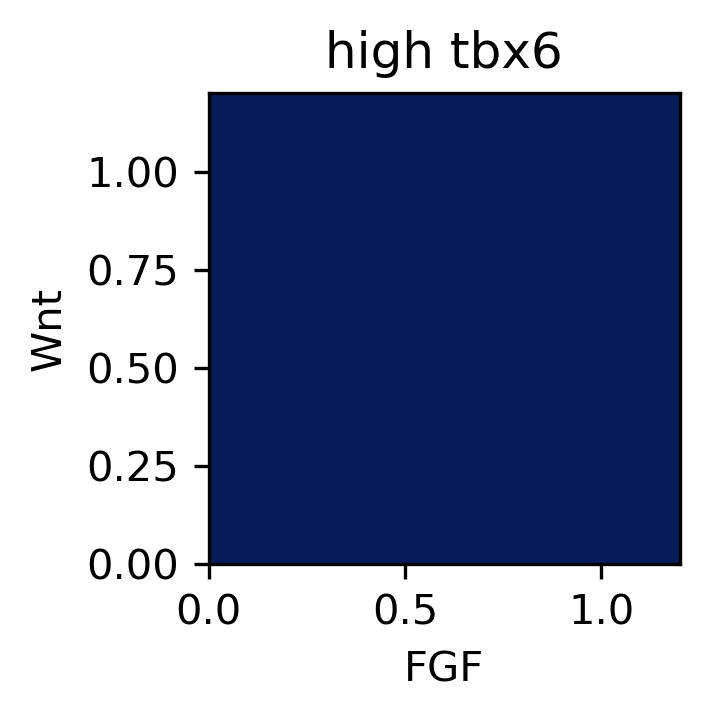

In [48]:
# Network 1
name = '6'
classified_attractors = pd.read_csv(
    f'../output/{name}_attr_basin.csv'
)

classified_attractors['FGF'] = classified_attractors['FGF_sim']
classified_attractors['Wnt'] = classified_attractors['Wnt_sim']
classified_attractors['attractor name'] = 'high tbx6'
classified_attractors.loc[
    classified_attractors['g3_traj'] < .1, 'attractor name'
    ] = 'low tbx6'
# classified_attractors.loc[
#     classified_attractors['attractor type'] == 'm', 'attractor name'
#     ] = 'spiral'


classified_attractors_2 = classified_attractors.groupby(['FGF', 'Wnt']).apply(
    extract_counts_of_attractors
    )
classified_attractors_2 = classified_attractors_2.reset_index(drop=True)

WNT_values = np.unique(classified_attractors_2['Wnt'])
FGF_values = np.unique(classified_attractors_2['FGF'])

fig, ax = plt.subplots(1, 1, figsize = (fig_height, fig_height),
                    sharex = True, sharey = True,
                    tight_layout = True)


names = classified_attractors_2.columns[2:]

idx = 0


# the replace is to make all 0 objects white
# so it's obvious where a given attractor is never present
# might be better to modify the colormap tbh
ax.imshow(np.reshape(list(classified_attractors_2[names[idx]].replace(0, np.nan)),
                    (len(WNT_values), len(WNT_values))
                    ),
        vmin = 1, vmax = ics.shape[0], **fargs)
ax.set_title(names[idx])
ax.set_xlabel('FGF')

ax.set_ylabel('Wnt')
plt.savefig(
    f'../graphics/phase_portrait/attr_count_by_sig_val_{name}.png'
)
